<a href="https://colab.research.google.com/github/carabiasjulio/fyea/blob/main/FyEA_Lab3_AudioSignalProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 3: PROCESADO DE AUDIO CON PYTHON**




## Apartado 1. Filtrado de señales periódicas
En esta primer apartado se pretende, de una forma gráfica, comprobar lo señalado por el desarrollo en serie de Fourier. Es decir, cualquier señal periódica se puede construir a partir de exponenciales complejas (senos y cosenos) de frecuencia igual a su frecuencia fundamental (F0) y sus armónicos.

La función “fun_cuadrada” definida a continuación permite la generación de una señal periódica cuadrada así como su posterior filtrado al objeto de ver el efecto de éste sobre la señal cuadrada original. Cuando se ejecuta, solicita los parámetros necesarios para su funcionamiento.

In [10]:
from scipy.fftpack import fft, fftshift, ifft
import matplotlib.pyplot as plt
import numpy as np


def fun_cuadrada(A, f, ct, fc, fs=200.0, t_ini=0.0, t_fin=5.0):
    """Esta funcion permite la generacion de una senal cuadrada periodica asi como  su posterior filtrado al objeto de
    comprobar el efecto de este sobre la senal original. El filtrado se ha realizado directamente en el dominio de la
    frecuencia eliminando las componentes indeseadas.
    Input:
        A: Amplitud (voltios)
        f: Frecuencia de la senal cuadrada (Hz)
        ct: Ciclo de trabajo (en tanto por uno)
        fc: Frecuencia de corte del filtro paso-bajo (Hz)
        fs: Frecuencia de muestreo (Hz)
        t_ini: Tiempo de inicio del intervalo de observacion (sg)
        t_fin: Tiempo final del intervalo de observacion (sg)
    Output:
        -
    """

    if ct > 1:
        assert('Introduce un ciclo de trabajo menor a 1.0')

    T = 1.0 / f

    # Creacion de la funcion base
    n_unos = int(np.round(ct * T * fs))
    n_ceros = int(np.round((1 - ct) * T * fs))
    base = np.hstack((A * np.ones(n_unos), np.zeros(n_ceros)))

    t = np.arange(t_ini, t_fin, 1/fs)  # Vector de instantes de muestreo
    LT = t.size
    n_per = np.fix(LT / base.size)  # periodos completos de la base
    x = base
    for i in np.arange(0, n_per):
        x = np.hstack((x, base))

    x = x[0:LT]  # Se afina longitud del vector

    # Visualizacin de la senal resultante
    fig1 = plt.figure(figsize=(10, 10))  # Adjust figure size as needed
    subplot1 = fig1.add_subplot(411)
    subplot1.plot(t, x); subplot1.axis([min(t), max(t), min(x) - .1, max(x) + 0.1])
    subplot1.set_xlabel('Segundos'); subplot1.set_ylabel('Voltage')
    subplot1.set_title('SENAL EN EL DOMINIO DEL TIEMPO')

    # fft
    fftx = fft(x)
    DEP = np.abs(fftx * np.conj(fftx))/LT

    subplot2 = fig1.add_subplot(412)
    subplot2.plot(np.linspace(-fs / 2, fs / 2, LT), fftshift(DEP))
    subplot2.set_xlabel('Frecuencia (Hz)'); subplot2.set_title('Densidad Espectral de Potencia')

    # Filtrado
    M = round(fc / fs * LT)
    Filtro = np.hstack((np.ones(int(M) + 1), np.zeros(int(LT) - (2 * int(M) + 1)), np.ones(int(M))))

    subplot3 = fig1.add_subplot(413)
    subplot3.plot(np.arange(-fs / 2, fs / 2, fs / (LT)), fftshift(Filtro))
    subplot3.plot(np.arange(-fs / 2, fs / 2, fs / (LT)), fftshift(abs(fftx) * Filtro / LT), 'r')
    subplot3.set_title('Filtro (azul) y salida del filtro (rojo)')

    subplot4 = fig1.add_subplot(414)
    subplot4.plot(t, np.real(ifft(fftx * Filtro)))
    subplot4.set_xlabel('Tiempo')
    subplot4.set_title('Salida del filtro (hasta ' + str(np.fix(fc / f)) + ' F0)')

    plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
    plt.show()

A continuación se muestra el ejemplo de una señal cuadrada de frecuencia 5 Hz, amplitud 2 y ciclo de trabajo 0.4, filtrada con un filtro paso-bajo de frecuencia de corte 7 Hz (componentes del desarrollo en serie de frecuencias 0 y F0) y 26 Hz (componentes del desarrollo en serie de frecuencias 0, F0, 2F0, 3F0, 4F0 y 5F0).

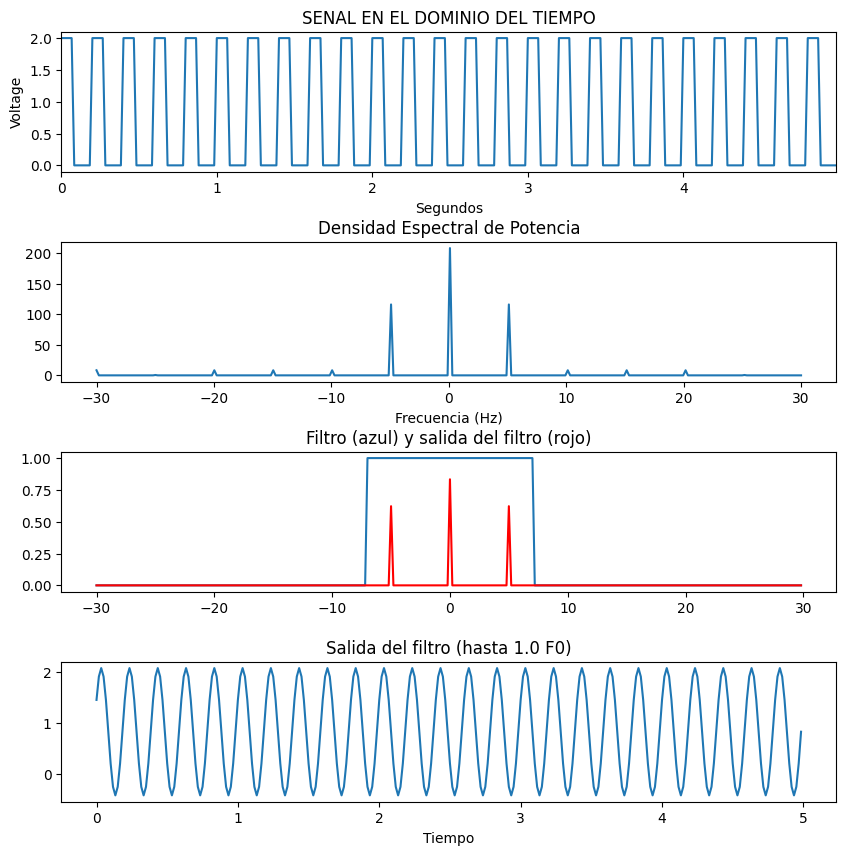

In [12]:
fun_cuadrada(A=2, f=5, ct=0.4, fc=7,fs=60)

Como se puede apreciar, cuando la frecuencia de corte del filtro paso-bajo, Fc, vale F0 < Fc < 2F0, en ese caso la salida es una sinusoide de frecuencia igual a la de la señal cuadrada (F0= 5 Hz) con un nivel de continua (componente del desarrollo en serie de Fourier de frecuencia cero).

En la gráfica siguiente se muestra el caso de usar una frecuencia de corte de 26 Hz.

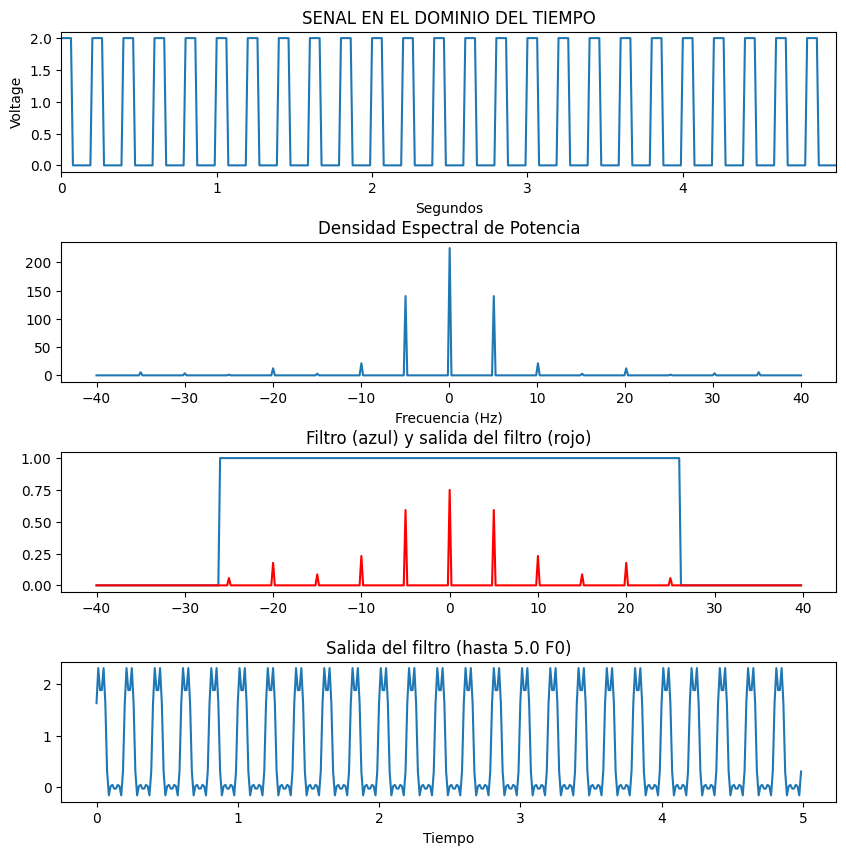

In [18]:
fun_cuadrada(A=2, f=5, ct=0.4, fc=26,fs=80)

Pruebe a incrementar la frecuencia de corte del filtro LP y comente brevemente en el recuadro que ocurre.

In [ ]:
# Your code here!

WRITE HERE!

## Apartado 2. Inversión del espectro

Este efecto convierte las frecuencias graves en agudas y viceversa. Según el ancho de banda así será la inversión. Este efecto se consigue multiplicando la secuencia de entrada por $cos(\pi*n)=(-1)^n$. Es decir, por cada 2 muestras, una permanece inalterada y la otra cambia su signo.
El siguiente esquema representa esta operación.

<center>
<img src="https://raw.githubusercontent.com/carabiasjulio/fyea/main/lab3_material/images/inversor.png"
alt="inversor" height="75">
</center>

A continuación se representa un ejemplo de aplicación de este efecto a una secuencia de muestras.

<center>
<img src="https://raw.githubusercontent.com/carabiasjulio/fyea/main/lab3_material/images/senal_inversion.png"
alt="señal inversion" height="500">
</center>

Implemente una función de PYTHON, llamada “inversor” que responda al siguiente esquema:

In [19]:
def inversor(x):
    """Inverts the spectrum of a signal

    Input:
        - x: Input signal as a NumPy array.

    Output:
        - y: Output signal with inverted spectrum.
    """
    # INSERT YOUR CODE HERE!

Igualmente, implemente una función de PYTHON que calcule y represente la densidad espectral de potencia una señal dada. Esta función debe responder al siguiente esquema:

In [20]:
def denpower(x, fs):
    """Calculates the Power Spectral Density (PSD) of a signal.

    Input:
        - x: Input signal as a NumPy array.
        - fs: Sampling frequency of the signal.

    Output:
        - DEP: Power Spectral Density of the signal.
    """
    # INSERT YOUR CODE HERE!

Además, se debe representar gráficamente la distribución en frecuencia de la potencia de la señal.  El eje de abscisas debe representar los hertzios de la componente en frecuencia correspondiente. Por ejemplo, representa la densidad espectral de potencia de una sinusoide de frecuencia 2 hertzios.

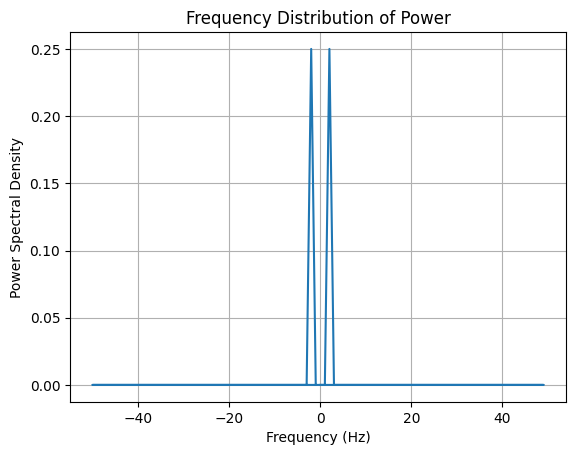

In [ ]:
fs = 100
t = np.linspace(0, 1, fs, endpoint=False)
x = np.sin(2*np.pi*2*t)
DEP = denpower(x, fs)
frequencies = np.fft.fftfreq(len(x), 1/fs)
plt.plot(frequencies, DEP)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Frequency Distribution of Power')
plt.grid(True)
plt.show()

Genere las muestras correspondientes a un tono de 1 KHz muestreado a 16 Khz, fase cero en el origen, amplitud 4, observado en el intervalo [0,4] segundos.  A continuación represente, usando la función “SUBPLOT” de PYTHON (ver implementación en el apartado 1 de esta práctica), dichas muestras, su densidad espectral de potencia, las muestras obtenidas a la salida del inversor y el espectro de éstas.

In [ ]:
# Insert your code HERE!

Repita los pasos del caso anterior pero esta vez para una frecuencia de sinusoide de 6 KHz.

In [ ]:
# Insert your code HERE!

Considere ahora una señal triangular de frecuencia 500 Hz. Represente esta señal en el tiempo, su densidad espectral de potencia, la salida del inversor y el espectro de ésta.

In [21]:
def triangular(A, f0, fs=1500.0, t_ini=0, t_fin=5):
    """ Genera senal triangular
    Input:
        - A: Amplitud
        - f0: Freq. Fundamental
        - fs: Frecuencia de muestreo (default 1500.0)
        - t_ini: Tiempo de inicio (default 0 segs)
        - t_fin: Tiempo de fin (default 5 segs)
    Output:
        - t: Vector de tiempos (en muestras)
        - tri: Senal triangular de salida

    PISTA: use la funcion signal.sawtooth (scipy)
    """
    # Insert your code HERE!

Repita los pasos anteriores pero para una señal cuadrada con ciclo de trabajo 0.4.

In [22]:
def cuadrada(A, f0, fs, B, t_ini=0, t_fin=5):
    """ Genera senal triangular
    Input:
        - A: Amplitud
        - f0: Freq. Fundamental
        - fs: Frecuencia de muestreo (default 1500.0)
        - B: Ciclo de trabajo (en el rango [0,1])
        - t_ini: Tiempo de inicio (default 0 segs)
        - t_fin: Tiempo de fin (default 5 segs)
    Output:
        - t: Vector de tiempos (en muestras)
        - y: Senal triangular de salida

    PISTA: use la funcion fun_cuadrada del ejercicio1
    """
    # Insert your code HERE!

Seguidamente, lea un fichero de audio , invierta su espectro, y escúchelo.

In [23]:
import soundfile as sd
from IPython.display import Audio

!wget https://raw.githubusercontent.com/carabiasjulio/fyea/main/lab3_material/signals/ursula.wav

x, fs = sd.read('ursula.wav')
# Insert your code HERE!

Audio(x, rate=fs)

--2024-11-04 18:10:02--  https://raw.githubusercontent.com/carabiasjulio/fyea/main/lab3_material/signals/ursula.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144044 (141K) [audio/wav]
Saving to: ‘ursula.wav’

ursula.wav          100%[===================>] 140.67K  --.-KB/s    in 0.04s   

2024-11-04 18:10:02 (3.33 MB/s) - ‘ursula.wav’ saved [144044/144044]



Finalmente, observemos el histograma de la señal de voz, lo que nos ofrecerá una idea de su función densidad de probabilidad.

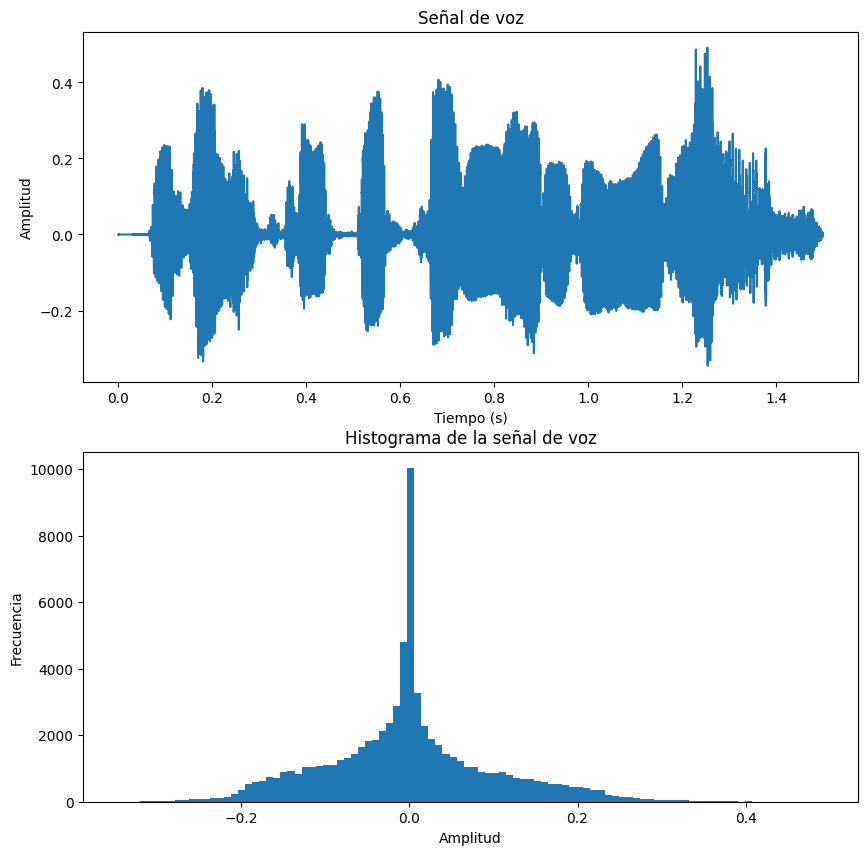

In [ ]:
t = np.arange(0, float(len(x))/fs, 1.0/fs)
fig = plt.figure(figsize=(10, 10))
subplot1 = fig.add_subplot(211)
subplot1.plot(t, x)
subplot1.set_title('Señal de voz')
subplot1.set_xlabel('Tiempo (s)'); subplot1.set_ylabel('Amplitud')
subplot2 = fig.add_subplot(212)
subplot2.hist(x, bins=100)
subplot2.set_title('Histograma de la señal de voz')
subplot2.set_xlabel('Amplitud'); subplot2.set_ylabel('Frecuencia')
plt.show()

Comente el resultado obtenido.

> WRITE HERE!



## Apartado 3: Grabe su propia voz

Usando Audacity, realice una grabación de su voz.
Reproduzca el vector obtenido usando para su reproducción frecuencias de muestreo diferentes a la original con que han sido obtenidas las muestras.
* ¿Qué ocurre si reproducimos la señal al doble de la frecuencia de muestreo de la usada en la grabación?
* ¿Y si ocurre al revés, es decir, si reproducimos a la mitad de la frecuencia de muestreo usada en grabación?

In [ ]:
# Insert your code HERE!

Usando la función “denpower” que ha desarrollado en el apartado 2 de la práctica, anteriormente indicada, represente gráficamente la distribución en frecuencia de la potencia de la señal de voz grabada.

In [ ]:
# Insert your code HERE!

Por último, se va a representar la distribución en frecuencia de algunos fonemas. En concreto, realice pruebas grabando una vocal (por ejemplo la “a”) y un fonema sordo (por ejemplo, la “s”). Use la función de PYTHON “spectrogram” para conocer cómo se distribuye la energía de la señal en frecuencia a lo largo del tiempo. Aparte, también use la función “denpower”. Compare los resultados obtenidos.

In [ ]:
from scipy.fftpack import fft, fftshift
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

def myspectrogram(x, fs, windowsize=282, hopsize=80, fftsize=512):
    """Similar to Matlab's function spectrogram"""
    if len(x.shape)>1: # Several channels
        x = x[:,0] # Take the first (left)

    f, t, X = signal.spectrogram(x, fs=fs, window=signal.hamming(windowsize), noverlap=hopsize, nfft=fftsize, mode='psd')
    plt.figure()
    plt.pcolormesh(t, f, 10.0*np.log10(X+np.spacing(1)))
    plt.ylabel('Frequency [kHz]')
    plt.xlabel('Time [sec]')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Power/frequency (dB/Hz)', rotation=270)
    plt.show()
    return f, t, X

In [ ]:
# Insert your code HERE!
# (Incluir gráfica: histogramas de los fonemas “a” y “s”)

Finalmente, y tal como se hizo en la práctica anterior, observemos el histograma para cada una de las grabaciones de voz realizadas. Compare los histogramas obtenidos para la vocal y el fonema sordo.

In [ ]:
# Insert your code HERE!
# (Incluir gráfica: histogramas de los fonemas “a” y “s”)

Por último, se va a filtrar la señal de voz utilizando varios filtros paso-banda.



In [ ]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    """Genera un filtro paso bandaInput:
            - data: Senal de entrada de tipo numpy array
            - lowcut: Frecuencia de corte inferior
            - high cut: Frecuencia de corte superior
            - fs: Frecuencia de muestreo
            - orden: numero coeficiones del filtro (default 6)
        Output:
            - y: Senal de salida obtenida como y(n) = x() * cos(pi*n), siendo n la muestra actual
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    y = signal.lfilter(b, a, data)
    return y

Para ello, realice una nueva grabación de voz usando una frecuencia de muestreo de 48 KHz. Use la función “butter_bandpass_filter” de PYTHON y filtre el vector de muestras de audio obtenido con los tres filtros siguientes:
* Filtro paso-banda 300Hz-3400Hz (calidad telefónica).
* Filtro paso-banda 200Hz-7200Hz (calidad AM).
* Filtro paso-banda 100Hz-11000Hz (calidad Reporting, voz de alta calidad).
* Filtro paso-banda 50Hz-15000Hz (calidad FM).

Repita los pasos anteriores pero usando como entrada el fichero “ursula.wav”.

In [ ]:
# Insert your code HERE!

En el siguiente cuadro, comente cómo varía la calidad de la señal conforme modificamos el ancho de banda.

> WRITE HERE!



## Apartado 4. Evaluación del nivel sonoro intensidad subjetiva

En este apartado se pretende distinguir entre los conceptos de intensidad y sonoridad (o intensidad subjetiva). La primera se corresponde con el nivel de amplitud (potencia) de la señal que llega al oído, y la segunda se corresponde con la sensación de amplitud-nivel con que se percibe en éste. Como se apreciará a través del desarrollo de este apartado, el nivel de sonoridad (intensidad subjetiva) con que se percibe una señal en el oído depende de su frecuencia. Como sabemos por teoría, aparte de la frecuencia, también depende del nivel de la señal (comportamiento no lineal del oído).

A continuación se representan los contornos de igual sonoridad (curvas “isofónicas” de igual nivel de sonoridad (su unidad es el fonio)) propuestas por Fletcher y Munson.

<center>
<img src="https://raw.githubusercontent.com/carabiasjulio/fyea/main/lab3_material/images/curvas_iso.png"
alt="señal inversion" height="500">
</center>

Cree una función en PYTHON que genere un tono. Sus parámetros de entrada serán la amplitud, frecuencia del tono, frecuencia de muestreo y número de muestras. Escriba en el siguiente recuadro el código de dicha función.


In [ ]:
# Insert your code HERE!

Seguidamente, para una frecuencia de muestreo de 44.1 KHz, genere 3 tonos diferentes de amplitud unidad y frecuencias 250 Hz, 1.2 KHz y 11 KHz. Usando la función “plot” de PYTHON, represéntelos en el dominio del tiempo (unidad del eje de abscisas en segundos).

In [ ]:
# Insert your code HERE!

A continuación, escuche los tonos generados prestando especial atención al nivel con que son percibidos en su oído. **¿Suenan con igual amplitud?**

> WRITE HERE!



Repita la escucha anterior de los 3 tonos pero con amplitudes de éstos de 0.5, 0.1, 0.05, 0.01 y 0.005. Para este punto, usaremos la función ''write'' de la libreria soundfile de PYTHON para generar los distintos ficheros de audio. Después los abriremos con audacity para su escucha.

**No modifique los niveles de los altavoces o de la salida de la tarjeta de audio del PC. Indique si, para un mismo nivel de amplitud, aprecia variaciones en el nivel con que percibe cada tono en su oído.**



In [ ]:
# Insert your code HERE!

**RELLENE LA TABLA**

| **Amplitud**   |              **Resultados**             |
| :------------: | :-------------------------------------: |
| 0.5            |                                         |
| 0.1            |                                         |
| 0.05           |                                         |
| 0.01           |                                         |
| 0.005          |                                         |

Genere tonos de amplitud 0.05 y escúchelos. Indique para qué frecuencias percibe el tono con mayor nivel.

**RELLENE LA TABLA**

| **Frecuencia** |              **Resultados**             |
| :------------: | :-------------------------------------: |
| 100 Hz         |                                         |
| 500 Hz         |                                         |
| 2000 Hz        |                                         |
| 4000 Hz        |                                         |
| 8000 Hz        |                                         |
| 12000 Hz       |                                         |

Por último, repita las pruebas anteriores (modificación de la frecuencia) pero incorporando la variación de la amplitud del tono. Compruebe la validez de las curvas de Fletcher y Munson.

**RELLENE LA TABLA**

| **Frec. / Amp.** |   1   |  0.5  |  0.1  |  0.05 |  0.01 | 0.005 |
| :------------:   | :---: | :---: | :---: | :---: | :---: | :---: |  
| 100 Hz           |       |       |       |       |       |       |
| 500 Hz           |       |       |       |       |       |       |
| 2000 Hz          |       |       |       |       |       |       |
| 4000 Hz          |       |       |       |       |       |       |
| 8000 Hz          |       |       |       |       |       |       |
| 12000 Hz         |       |       |       |       |       |       |

## Apartado 5. Enmascaramiento en frecuencia

Un efecto conocido del oído es el denominado enmascaramiento. Éste corresponde con la modificación del umbral de silencio debido a la presencia de un sonido. A este sonido se le denomina “enmascarante”. Cualquier otro sonido cuyo nivel esté por debajo de ese nuevo umbral, llamado umbral de enmascaramiento, no será percibido por el oído.

<center>
<img src="https://raw.githubusercontent.com/carabiasjulio/fyea/main/lab3_material/images/enmascaramiento.gif"
alt="señal inversion" height="500">
</center>

Siga los siguientes pasos:
*	Genere un tono de 1 KHz, amplitud 0.8, frecuencia de muestreo de 16 KHz, y 2 segundos de duración. Escúchelo.
*	Genere un segundo tono de 1.5 KHz, frecuencia de muestreo de 16 KHz, 2 segundos de duración y amplitud de valor un quinto al del primer tono generado. Escuche este segundo tono.
*	Sume ambos tonos y escuche la señal resultante. **Compruebe que se escucha un único tono. Incremente la frecuencia del tono más débil hasta perciba los dos tonos. Anote la frecuencia para la que comienza a distinguir el 2º tono.**



In [ ]:
# Insert your code HERE!



> WRITE HERE!



# Apartado 6. Simulación del efecto Haas

El efecto Haas, también es conocido como "Efecto de precedencia o prioridad". El nombre se debe a Hemult Hass, médico alemán que lo describió en su tesis doctoral.

El oído humano no sólo depende de cómo de alto sea un sonido para establecer de dónde viene, sino que además utiliza el tiempo de retardo que emplea en llegar hasta nosotros. En otras palabras, si el sonido proviene de diversas fuentes, el cerebro únicamente toma en cuenta el sonido que proviene de la fuente más cercana.
Este efecto tiene mucha importancia tanto en los sistemas estéreo, donde se cuida la colocación de los altavoces y el oyente, como en los sistemas de cine en casa, donde es importante establecer un tiempo de retardo entre los altavoces traseros y los delanteros, para que, aunque los canales traseros estén más cerca de nosotros que los delanteros, el sonido parezca que proviene de delante.
El efecto Haas describe cómo, a nivel de percepción, si varios sonidos independientes llegan a nuestro cerebro en una ventana temporal inferior a 50 ms, éste los fusiona y los interpreta como uno sólo. Esto se debe a que el cerebro deja de percibir la dirección y entiende los sonidos posteriores como un eco o reverberación del primero.

Esta interpretación el cerebro la hace de cuatro modos distintos:

*	Si el retardo es inferior a 5 ms, el cerebro localiza al sonido en función de la dirección que tuviera el primer estímulo, aunque los otros provengan de direcciones diametralmente opuestas. En un sistema estéreo, el sonido se escucha en un punto central muy focalizado situado en la bisectriz del ángulo de los dos altavoces, con la impresión subjetiva de ser de doble intensidad por la suma de la emisión de los dos canales.
*	Si el retardo llega entre 5 y 35 ms, el oyente escucha un único sonido, sigue siendo de intensidad doble pero empieza a distinguir la procedencia del mismo. En un sistema estéreo, el sonido se escucha en un punto central alto más amplio, en la bisectriz del ángulo de los dos altavoces.
*	Si el retardo llega entre 35 y 50 ms, se oye el sonido de manera separada de las diferentes fuentes, pero procedente de la fuente inicial, con algo menos de intensidad. En un sistema estéreo el sonido se sigue escuchando proveniente de entre los dos altavoces, pero se distingue la colocación de ambos. Es decir, empieza a perder "consistencia" la escena sonora.
*	Si el retardo llega con un tiempo superior a 50 ms, el sonido se oye de manera separada y procedente de cada una de las fuentes, con su respectiva intensidad. En un sistema estéreo, no existiría escena sonora, notaríamos perfectamente dónde está cada altavoz y qué sonido proviene de cada uno. **En este caso, se produce el efecto conocido como eco.**

En este apartado se pretende reproducir el efecto Haas. Para ello, realice los siguientes pasos:
*	Grabe una o dos palabras intentando que la calidad obtenida sea alta.
*	A continuación, implemente una función en PYTHON que introduzca un retardo a la señal original y que éstas, tanto la original como la retardada, se escuchen por el canal izquierdo-derecho del auricular. Tome como referencia el siguiente ejemplo:


In [24]:
import soundfile as sd
from IPython.display import Audio

!wget https://raw.githubusercontent.com/carabiasjulio/fyea/main/lab3_material/signals/haas_left.wav

x, fs = sd.read('haas_left.wav')
# Insert your code here!

--2024-11-04 18:20:03--  https://raw.githubusercontent.com/carabiasjulio/fyea/main/lab3_material/signals/haas_left.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238044 (232K) [audio/wav]
Saving to: ‘haas_left.wav’

haas_left.wav       100%[===================>] 232.46K  --.-KB/s    in 0.05s   

2024-11-04 18:20:04 (4.35 MB/s) - ‘haas_left.wav’ saved [238044/238044]



Pruebe con los siguientes valores de retardo: 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200 y 500 ms.

**RELLENE LA TABLA**

| **Retardo (ms)** |              **Resultados**             |
| :--------------: | :-------------------------------------: |
| 0                |                                         |
| 10               |                                         |
| 20               |                                         |
| 30               |                                         |
| 40               |                                         |
| 50               |                                         |
| 60               |                                         |
| 70               |                                         |
| 80               |                                         |
| 90               |                                         |
| 100              |                                         |
| 200              |                                         |
| 500              |                                         |

Indique los resultados obtenidos (si se aprecia eco o no, efecto estéreo?, origen del sonido,…)



> WRITE HERE!



## Apartado 7. Filtro Multi-eco

Este filtro realiza un infinito número de ecos espaciados R periodos simples con decaimiento exponencial de amplitud.

El diagrama de bloques del filtro multi-eco se muestra a continuación.

<center>
<img src="https://raw.githubusercontent.com/carabiasjulio/fyea/main/lab3_material/images/multieco.jpg"
alt="señal inversion" height="150">
</center>

Su función de transferencia viene dada por:
<center>$H(z)=\frac{z^{-R}}{1-az^{-R}}$</center>

Representa a la respuesta al impulso, h[n], del sistema anterior y su respuesta en frecuencia, H(z).

In [ ]:
# YOUR CODE HERE!
# Incluir gráfica solicitada

Comente los resultados obtenidos al realizar las siguientes pruebas con el fichero el fichero “clackson.wav”:

a) Manteniendo constante en valor del parámetro $\alpha$ en 0.9, varíe el valor del retardo introducido asignando los siguientes valores: 1 ms, 5 ms, 20 ms, 50 ms, 100 ms, 200 ms, 500 ms, 2 segundos. Obviamente, para determinar el número de etapas de retardo, R, que debe incluir ha de considerar la frecuencia de muestreo. Escuche los resultados obtenidos. Indique para qué valores de retardo se percibe el eco.


In [25]:
!wget https://raw.githubusercontent.com/carabiasjulio/fyea/main/lab3_material/signals/clackson.wav
x, fs = sd.read('clackson.wav')
Audio(x, rate=fs)

# Insert your code HERE!

--2024-11-04 18:20:21--  https://raw.githubusercontent.com/carabiasjulio/fyea/main/lab3_material/signals/clackson.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36570 (36K) [audio/wav]
Saving to: ‘clackson.wav’

clackson.wav        100%[===================>]  35.71K  --.-KB/s    in 0.02s   

2024-11-04 18:20:21 (2.23 MB/s) - ‘clackson.wav’ saved [36570/36570]



**RELLENE LA TABLA**

| **Retardo (ms)** |              **¿Eco?**             |
| :--------------: | :-------------------------------------: |
| 1                |                                         |
| 5                |                                         |
| 20               |                                         |
| 50               |                                         |
| 100              |                                         |
| 200              |                                         |
| 500              |                                         |
| 2000             |                                         |

b)	Ahora mantenga constante el valor del retardo en 50 milisegundos y varíe los valores del parámetro $\alpha$ asignándole los valores de 0.03, 0.1, 0.3, 0.5, 0.7, 0.85, 1, 1.5. Escuche los resultados obtenidos. Indique para qué valores de retardo se percibe el eco

In [ ]:
# Your code here!

**RELLENE LA TABLA**

|   **$\alpha$**   |              **¿Eco?**             |
| :--------------: | :-------------------------------------: |
| 0.03             |                                         |
| 0.1              |                                         |
| 0.3              |                                         |
| 0.5              |                                         |
| 0.7              |                                         |
| 0.85             |                                         |
| 1                |                                         |
| 1.5              |                                         |